In [8]:
# coding=utf-8         
import os  
import sys
import pandas as pd
import numpy as np
import matplotlib
import scipy
import matplotlib.pyplot as plt
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer 

In [3]:
#存储读取语料 一行预料为一个文档 
corpus =[line.strip() for line in open('out_file_name.txt', 'r',encoding='utf-8').readlines()]
    
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(corpus)
print(vectorizer)

X = vectorizer.fit_transform(corpus)
analyze = vectorizer.build_analyzer()
weight = X.toarray()
 
print(len(weight))
print(weight[:5, :5])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['区块链, 是, 分布式数据存储计算机技术新型应用模式', '区块链, 是, 比特币一个重要概念', '有效性, 用于, 验证其信息', '比特币白皮书英文原版, 出现, blockchain一词', '这, 是, 区块链这一中文词出现时间', '区块链这一中文词, 出现, 时间', '区块链, 是, 一种组合一种链式数据结构', '区块链技术, 是, 利用块链式数据结构', '共识算法, 利用, 分布式节点', '利用分布式节点共识算法, 生成, 数据', '利用分布式节点共识算法生成数据方式, 保证, 数据传输安全一种全新分布式基础架构', '数据层, 封装, 底层数据区块基...技术, 激活, 很多传统保障模式', '区块链技术, 应用于, 金融行业征信', '网络安全, 适合, 分布式区域块技术形成点对点数字价值转移', '分布式区域块技术, 形成, 点对点数字价值转移'],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
213
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [21]:
data=pd.read_csv('out_file_name.txt',header=None)
data.columns=['object','relation','subject']

In [23]:
#LDA算法
#print 'LDA:'
import numpy as np
import lda
import lda.datasets

In [24]:
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)
model.fit(np.asarray(weight))     # model.fit_transform(X) is also available
topic_word = model.topic_word_    # model.components_ also works

INFO:lda:n_documents: 213
INFO:lda:vocab_size: 461
INFO:lda:n_words: 552
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -5870
INFO:lda:<10> log likelihood: -4878
INFO:lda:<20> log likelihood: -4887
INFO:lda:<30> log likelihood: -4876
INFO:lda:<40> log likelihood: -4852
INFO:lda:<50> log likelihood: -4873
INFO:lda:<60> log likelihood: -4887
INFO:lda:<70> log likelihood: -4869
INFO:lda:<80> log likelihood: -4868
INFO:lda:<90> log likelihood: -4918
INFO:lda:<100> log likelihood: -4885
INFO:lda:<110> log likelihood: -4858
INFO:lda:<120> log likelihood: -4837
INFO:lda:<130> log likelihood: -4907
INFO:lda:<140> log likelihood: -4843
INFO:lda:<150> log likelihood: -4868
INFO:lda:<160> log likelihood: -4852
INFO:lda:<170> log likelihood: -4883
INFO:lda:<180> log likelihood: -4863
INFO:lda:<190> log likelihood: -4894
INFO:lda:<200> log likelihood: -4845
INFO:lda:<210> log likelihood: -4854
INFO:lda:<220> log likelihood: -4857
INFO:lda:<230> log likelihood: -4830
INFO:lda

In [33]:
#输出前10篇文章最可能的Topic
data['topic_num']=np.nan
for n in range(0,doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    data.iloc[n,3]=int(topic_most_pr)
    print("doc: {} topic: {}".format(n, topic_most_pr))

doc: 0 topic: 4
doc: 1 topic: 4
doc: 2 topic: 0
doc: 3 topic: 1
doc: 4 topic: 0
doc: 5 topic: 1
doc: 6 topic: 4
doc: 7 topic: 1
doc: 8 topic: 1
doc: 9 topic: 3
doc: 10 topic: 2
doc: 11 topic: 4
doc: 12 topic: 0
doc: 13 topic: 4
doc: 14 topic: 4
doc: 15 topic: 4
doc: 16 topic: 3
doc: 17 topic: 4
doc: 18 topic: 1
doc: 19 topic: 1
doc: 20 topic: 4
doc: 21 topic: 4
doc: 22 topic: 2
doc: 23 topic: 0
doc: 24 topic: 3
doc: 25 topic: 1
doc: 26 topic: 2
doc: 27 topic: 0
doc: 28 topic: 0
doc: 29 topic: 2
doc: 30 topic: 2
doc: 31 topic: 2
doc: 32 topic: 2
doc: 33 topic: 1
doc: 34 topic: 1
doc: 35 topic: 3
doc: 36 topic: 1
doc: 37 topic: 4
doc: 38 topic: 1
doc: 39 topic: 4
doc: 40 topic: 0
doc: 41 topic: 2
doc: 42 topic: 3
doc: 43 topic: 4
doc: 44 topic: 0
doc: 45 topic: 4
doc: 46 topic: 3
doc: 47 topic: 1
doc: 48 topic: 2
doc: 49 topic: 3
doc: 50 topic: 3
doc: 51 topic: 3
doc: 52 topic: 3
doc: 53 topic: 0
doc: 54 topic: 2
doc: 55 topic: 4
doc: 56 topic: 2
doc: 57 topic: 2
doc: 58 topic: 4
doc: 59

In [37]:
data=data.set_index('topic_num')
data

,object,relation,subject
topic_num,,,
0.0,bitcoin,还有,各种衍生应用
0.0,交易,获得,该区块链确认
0.0,任何个体,发送,交易
0.0,货币发行区块链,定义,未来金融经济新格局
0.0,这个东西,就是,bitcoin
0.0,我们,形成,一个比如叫做finance-internet东西
0.0,火币,是,联合发起单位之一
0.0,用户,刻在,区块链上
0.0,私有区块链,使用,区块链总账技术


In [38]:
data.to_csv('topic_file.txt')

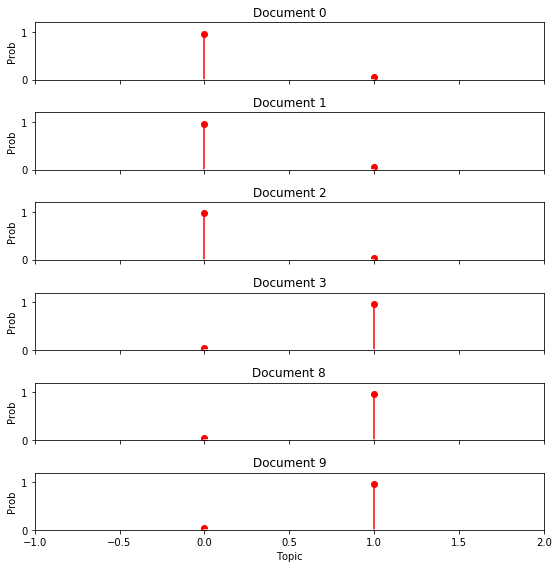

In [19]:
      
#计算文档主题分布图
import matplotlib.pyplot as plt  
f, ax= plt.subplots(6, 1, figsize=(8, 8), sharex=True)  
for i, k in enumerate([0, 1, 2, 3, 8, 9]):  
    ax[i].stem(doc_topic[k,:], linefmt='r-',  
                markerfmt='ro', basefmt='w-')  
    ax[i].set_xlim(-1, 2)     #x坐标下标
    ax[i].set_ylim(0, 1.2)    #y坐标下标
    ax[i].set_ylabel("Prob")  
    ax[i].set_title("Document {}".format(k))  
ax[5].set_xlabel("Topic")
plt.tight_layout()
plt.show()  

In [29]:
doc_topic.shape[0]

213